<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

### Index

* [Etape 1 - Importation des librairies et chargement des fichiers](#chapter1)
    * [1.1 - Importation des librairies](#section_1_1)
    * [1.2 - Chargements des fichiers](#section_1_2)
* [Etape 2 - Analyse exploratoire/Traitement des fichiers](#chapter2)
    * [2.1 - Analyse exploratoire du fichier erp.xlsx](#section_2_1)
        * [2.1.1 - Modification colonnes 'product_id' et 'onsale_web' en type "Object"](#section_2_1_1)
        * [2.1.2 - Vérifications des valeurs négatives colonnes 'price' et 'stock_quantity'](#section_2_1_2)
        * [2.1.3 - Traitement de la colonnes 'stock_status' en fonction de la colonne stock_quantity](#section_2_1_3)
        * [2.1.4 - Traitement de la colonne 'onsale_web' et création d'une variable 'ProduitsAMettreEnLigne'](#section_2_1_4)
        * [2.1.5 - Vérification si prix de ventes > prix d'achats et création d'une variable 'PrixAchatAVerifier'](#section_2_1_5)
    * [2.2 - Analyse exploratoire du fichier liaison.xlsx](#section_2_2)
    * [2.3 - Analyse exploratoire du fichier web.xlsx](#section_2_3)
        * [2.3.1 - Codes articles manquants](#section_2_3_1)
        * [2.3.2 - Remplacement des articles manquants pars le product_id (4 derniers caractères du lien https)](#section_2_3_2)
        * [2.3.3 - Remplacement des sku table df_liaison](#section_2_3_3)
        * [2.3.4 - Liste des codes articles ne respectant pas la régle de codification](#section_2_3_4)
        * [2.3.5 - Création du df_web_produit fonction de post_type ](#section_2_3_5)
        * [2.3.6 - Vérifications des valeurs négatives colonne 'total_sales' ](#section_2_3_6)
        * [2.3.7 - Renommer la colonne 'sku' en 'id_web' ](#section_2_3_7)
        * [2.3.8 - Suppression du code promo ](#section_2_3_8)
* [Etape 3 - Jonction des fichiers](#chapter3)
    * [3.1 - Réalisation de la jointure entre df_erp et df_liaison](#section_3_1)
    * [3.2 - Réalisation de la jointure entre df_merge et df_web](#section_3_2)
    * [3.3 - Vérification des différences entre df_merge et df_web](#section_3_3)
* [Etape 4 - Analyse univarié](#chapter4)
    * [4.1 - Analyse de la variable 'price'](#section_4_1)
        * [4.1.1 Exploration graphique 'price'](#section_4_1_1)
        * [4.1.2 Exploration Statistique 'price'](#section_4_1_2)
        * [4.1.3 Identification avec le z-score 'price'](#section_4_1_3)
        * [4.1.4 Identification par l'interval interquartile 'price'](#section_4_1_4)
* [Etape 5 - Calcul et analyse du CA et de la marge. Analyses complémentaire des quantités vendues et des stocks](#chapter5)
    * [5.1 - Analyse des ventes en CA](#section_5_1)
        * [5.1.1 Calculer le CA su site web ](#section_5_1_1)
        * [5.1.2 Palmares des articles en CA](#section_5_1_2)
        * [5.1.3 Calculer le 20 / 80 en CA](#section_5_1_3)
    * [5.2 - Analyse des quantités vendus](#section_5_2)
        * [5.2.1 Palmares des articles en quantité vendus](#section_5_2_1)
        * [5.1.2 Calculer le 20 / 80 ventes en quantité](#section_5_1_2)
        * [5.3.3 Valorisation du nombre de produit en stock](#section_5_3_3)
    * [5.3 - Analyse des stocks](#section_5_3)
        * [5.3.1 Calcule le nombre de mois de stock](#section_5_3_1)
        * [5.3.2 Valorisation des stocks en euros](#section_5_3_2)
        * [5.3.3 Nombre de produit en stock](#section_5_3_3)
    * [ 5.4 -Analyse du taux de marge](#section_5_4)
        * [5.4.1 Création du taux de marge](#section_5_4_1)
        * [5.4.2 Analyse du taux de marge](#section_5_4_2)
* [Etape 6 - Analyse bivarié et études des corrélations](#chapter6)


[def]: #section_2_3_2

<div style="display: flex; background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
<a class="anchor" id="chapter1"></a>
</div>

<div style="display: flex; background-color: RGB(255,114,0);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">1.1 - Importation des librairies</h3>
<a class="anchor" id="section_1_1"></a>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd

In [2]:
#Importation de la librairie plotly express
import plotly.express as px

In [3]:
# Importation librairie Numpy
import numpy as np

In [4]:
# Pour afficher un nombre maximum de colonnes
pd.set_option('display.max_columns', None)

In [5]:
# Importation librairie matplotlib
import matplotlib.pyplot as plt

In [6]:
#Importation de Seaborn
import seaborn as sns

<div style="display: flex; background-color: RGB(255,114,0);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">1.2 - Chargements des fichiers</h3>
<a class="anchor" id="section_1_2"></a>
</div>

In [7]:
#Importation du fichier web.xlsx
df_web = pd.read_excel('C:\\Users\\wadja\\Desktop\\Openclassroom\\Projet 6\\Data+Bottleneck\\web.xlsx')
#Importation du fichier erp.xlsx
df_erp = pd.read_excel('C:\\Users\\wadja\\Desktop\\Openclassroom\\Projet 6\\Data+Bottleneck\\erp.xlsx')
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel('C:\\Users\\wadja\\Desktop\\Openclassroom\\Projet 6\\Data+Bottleneck\\liaison.xlsx')

C:\Users\WadJa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\WadJa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\WadJa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<div style="display: flex; background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire/Traitement des fichiers</h2>
<a class="anchor" id="chapter2"></a>
</div>

<div style="display: flex; background-color: RGB(255,114,0);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
<a class="anchor" id="section_2_1"></a>
</div>

In [8]:
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [9]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


In [10]:
df_erp.describe(include='all')

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
count,825.000000,825.000000,825.000000,825.000000,825,825.000000
unique,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,instock,NaN
freq,NaN,NaN,NaN,NaN,733,NaN
mean,5162.597576,0.867879,32.187697,21.589091,NaN,16.940582
std,902.644635,0.338828,26.712077,21.933807,NaN,14.561840
min,3847.000000,0.000000,-20.000000,-10.000000,NaN,2.740000
25%,4348.000000,1.000000,14.500000,7.000000,NaN,7.590000
50%,4907.000000,1.000000,24.300000,18.000000,NaN,12.710000
75%,5805.000000,1.000000,42.000000,30.000000,NaN,22.020000


In [11]:
# Conclusion :
# - Transformations des colonnes 'product_id' et 'onsale_web' en type Object afin d'analyser les valeurs unique avec .describe

<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">2.1.1 - Modification colonnes 'product_id' et 'onsale_web' en type "Object" </h3>
<a class="anchor" id="section_2_1_1"></a>
</div>

In [12]:
df_erp['product_id'] = df_erp['product_id'].astype(object)

df_erp['onsale_web'] = df_erp['onsale_web'].astype(object)

In [13]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    object 
 1   onsale_web      825 non-null    object 
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 38.8+ KB


In [14]:
df_erp.describe(include='all')

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
count,825.0,825.0,825.000000,825.000000,825,825.000000
unique,825.0,2.0,NaN,NaN,2,NaN
top,3847.0,1.0,NaN,NaN,instock,NaN
freq,1.0,716.0,NaN,NaN,733,NaN
mean,NaN,NaN,32.187697,21.589091,NaN,16.940582
std,NaN,NaN,26.712077,21.933807,NaN,14.561840
min,NaN,NaN,-20.000000,-10.000000,NaN,2.740000
25%,NaN,NaN,14.500000,7.000000,NaN,7.590000
50%,NaN,NaN,24.300000,18.000000,NaN,12.710000
75%,NaN,NaN,42.000000,30.000000,NaN,22.020000


In [15]:
# Conclusion :

# - Colonne 'product_id' : Pas de doublon 

# - Colonne 'onsale_web' : 716 Referances de bouteilles en ligne

# - Colonne 'price' : Valeur négative à analyser 

# - Colonne 'stock_quantity' : Valeur négative à analyser 

# - Colonne 'stock_status' : 733 References de bouteilles en stock

# - Colonne 'purchase_price' : Pas de valeurs manquantes

# Taches à réaliser : 

# 2.1.2 Vérifications des valeurs négatives colonnes 'price' et 'stock_quantity'
# 2.1.3 Traitement de la colonne 'stock_status' en fonction de la colonne 'stock_quantity'
# 2.1.4 Traitement de la colonne 'onsale_web' en fonction de la colonne 'stock_status'
# 2.1.5 Vérification si le prix de ventes > prix d'achats 


<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">2.1.2 Vérifications des valeurs négatives colonnes 'price' et 'stock_quantity' </h3>
<a class="anchor" id="section_2_1_2"></a>
</div>

In [16]:
###############
#### price ####
###############

#Affichier les prix inférieurs à 0
print("Prix inférieurs à 0:\n", df_erp[df_erp['price'] < 0])

Prix inférieurs à 0:
     product_id onsale_web  price  stock_quantity stock_status  purchase_price
151       4233          0  -20.0               0   outofstock           10.33
469       5017          0   -8.0               0   outofstock            4.34
739       6594          0   -9.1              19      instock            4.61


In [17]:
# Trabsformer en valeurs négatives en valeurs positives :
df_erp['price'] = np.abs(df_erp['price'])

In [18]:
#Vérification : afficher les valeurs pour les lignes 151, 469, et 739
print(df_erp['price'].iloc[[151, 469, 739]])

151    20.0
469     8.0
739     9.1
Name: price, dtype: float64


In [19]:
#Vérification : affichier les prix inférieurs à 0
print("Prix inférieurs à 0:\n", df_erp[df_erp['price'] < 0])

Prix inférieurs à 0:
 Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price]
Index: []


In [20]:
#######################
### stock_quantity  ###
#######################

#Affichier les stocks inférieurs à 0
print("Stocks inférieurs à 0:\n", df_erp[df_erp['stock_quantity'] < 0])

Stocks inférieurs à 0:
     product_id onsale_web  price  stock_quantity stock_status  purchase_price
449       4973          0   10.0             -10   outofstock            4.96
573       5700          1   44.5              -1   outofstock           22.30


In [21]:
#Valeurs abérante et stock_status 'outofstock' : Corriger les données incohérentes 
#Corriger 'stock_quantity' par 0 pour les lignes 449 et 573

df_erp.at[449, "stock_quantity"] = 0
df_erp.at[573, "stock_quantity"] = 0

In [22]:
#Vérification : afficher les valeurs pour les lignes 449 et 573
print(df_erp.iloc[[449, 573]])

    product_id onsale_web  price  stock_quantity stock_status  purchase_price
449       4973          0   10.0               0   outofstock            4.96
573       5700          1   44.5               0   outofstock           22.30


In [23]:
#Vérification : affichier les stocks inférieurs à 0
print("Stocks inférieurs à 0:\n", df_erp[df_erp['stock_quantity'] < 0])

Stocks inférieurs à 0:
 Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price]
Index: []


<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">2.1.3 Traitement de la colonne 'stock_status' en fonction de la colonne 'stock_quantity' </h3>
<a class="anchor" id="section_2_1_3"></a>
</div>

In [24]:
#Si la valeur de la colonne "stock_quantity" est inferieur ou égale à 0, indiquer dans la colonne 'stock_status' : "outofstock" sinon "instock"

df_erp['stock_status'] = np.where(df_erp['stock_quantity'] <= 0, "outofstock", "instock")
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,instock,23.77
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48
821,7204,0,45.0,9,instock,24.18
822,7247,1,54.8,6,instock,27.18
823,7329,0,26.5,14,instock,13.42


<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">2.1.4 Traitement de la colonne 'onsale_web' et création d'une variable 'ProduitsAMettreEnLigne'  </h3>
<a class="anchor" id="section_2_1_4"></a>
</div>

In [25]:
# Valeurs unique onsale_web : [1 0]  
# Signifie en ligne sur le site web 1=oui 0=non 

# Condition: Si stock_quantity est égal à 0, alors onsale_web est mis à 0
df_erp.loc[df_erp['stock_quantity'] == 0, 'onsale_web'] = 0

In [26]:
# onsale_web2 = 1 si stock_status = 'instock' sinon onsale_web2= 0
df_erp['onsale_web_2'] = np.where(df_erp['stock_status'] == "instock", 1, 0)

#Liste des lignes différentes entre 'onsale_web' et 'onsale_web2' 
lignesOnsale_web = df_erp[df_erp["onsale_web"] != df_erp["onsale_web_2"]]
lignesOnsale_web

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,onsale_web_2
123,4200,0,5.8,33,instock,3.12,1
234,4565,0,30.5,3,instock,15.92,1
238,4577,0,49.0,1,instock,24.05,1
239,4578,0,40.0,3,instock,20.05,1
318,4692,0,12.0,48,instock,6.39,1
...,...,...,...,...,...,...,...
818,7200,0,31.0,6,instock,15.54,1
819,7201,0,31.0,18,instock,16.02,1
820,7203,0,45.0,30,instock,23.48,1
821,7204,0,45.0,9,instock,24.18,1


In [27]:
# 65 References produits à mettre en lignes :

#Création d'une variable 'ProduitsAMettreEnLigne' pour lister les poduct_id à mettre en ligne sur le site web'

ProduitsAMettreEnLigne = lignesOnsale_web['product_id'].tolist()

print(ProduitsAMettreEnLigne)

[4200, 4565, 4577, 4578, 4692, 4697, 4738, 4744, 5559, 5560, 5569, 5808, 6324, 6594, 6821, 6824, 6825, 6826, 6864, 6866, 6869, 6875, 6898, 6899, 6902, 6903, 6904, 6905, 6906, 6907, 6908, 6909, 7008, 7009, 7010, 7015, 7081, 7084, 7085, 7086, 7087, 7088, 7131, 7132, 7133, 7136, 7137, 7159, 7161, 7162, 7163, 7164, 7168, 7169, 7170, 7192, 7193, 7194, 7195, 7196, 7200, 7201, 7203, 7204, 7329]


In [28]:
#Suppression de la colonne 'onsale_web2'
df_erp = df_erp.drop('onsale_web_2', axis=1)

<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">2.1.5 Vérification si prix de ventes > prix d'achats et création d'une variable 'PrixAchatAVerifier'  </h3>
<a class="anchor" id="section_2_1_5"></a>
</div>

In [29]:
# Pour vérifier si 'purchase_price' est supérieure ou égale à 'price'
VenteAPerte = df_erp[df_erp['purchase_price'] >= df_erp['price']]

print(VenteAPerte)

    product_id onsale_web  price  stock_quantity stock_status  purchase_price
210       4355          1  12.65              97      instock           77.48
391       4864          0   8.30               0   outofstock            9.99
724       6324          0  92.00              18      instock           99.00
817       7196          0  31.00              55      instock           31.20


In [30]:
# Conclusion : Promotion de destockage ou erreur de saisie ?
# Création d'une liste avec les id_produit : 

VentesApertes = VenteAPerte['product_id'].tolist()
VentesApertes
 

[4355, 4864, 6324, 7196]

In [31]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    object 
 1   onsale_web      825 non-null    object 
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 38.8+ KB


In [32]:
df_erp.describe(include='all')

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
count,825.0,825.0,825.000000,825.000000,825,825.000000
unique,825.0,2.0,NaN,NaN,2,NaN
top,3847.0,1.0,NaN,NaN,instock,NaN
freq,1.0,668.0,NaN,NaN,733,NaN
mean,NaN,NaN,32.277636,21.602424,NaN,16.940582
std,NaN,NaN,26.603196,21.917863,NaN,14.561840
min,NaN,NaN,5.200000,0.000000,NaN,2.740000
25%,NaN,NaN,14.500000,7.000000,NaN,7.590000
50%,NaN,NaN,24.300000,18.000000,NaN,12.710000
75%,NaN,NaN,42.000000,30.000000,NaN,22.020000


<div style="display: flex; background-color: RGB(255,114,0);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">2.2 - Analyse exploratoire du fichier liaison.xlsx</h3>
<a class="anchor" id="section_2_2"></a>
</div>

In [33]:
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">2.1.1 - Modification colonnes 'product_id' et 'onsale_web' en type "Object" </h3>
<a class="anchor" id="section_2_1_1"></a>
</div>

In [34]:
df_liaison['product_id'] = df_liaison['product_id'].astype(object)

In [35]:
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    object
dtypes: object(2)
memory usage: 13.0+ KB


In [36]:
df_liaison.describe(include='all')

,id_web,product_id
count,734,825
unique,734,825
top,15298,3847
freq,1,1


In [37]:
# Les valeurs de la colonne "id_web" et "product_id" sont toutes uniques

# Calcul du nombre d'occurrences dans chaque colonne
Unique_product_id = set(df_liaison['product_id'].dropna())
Unique_id_web = set(df_liaison['id_web'].dropna())

nb_product_id = len(Unique_product_id )
nb_id_web = len(Unique_id_web)

# Calcul des lignes sans correspondances
id_web_manquants = nb_product_id - nb_id_web

print(f"Nombre d'éléments 'product_id' : {nb_product_id}")
print(f"Nombre d'éléments 'id_web' : {nb_id_web}")

print('Il y a :',id_web_manquants,'id_web sans corespondances')



Nombre d'éléments 'product_id' : 825
Nombre d'éléments 'id_web' : 734
Il y a : 91 id_web sans corespondances


<div style="display: flex; background-color: RGB(255,114,0);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">2.3 - Analyse exploratoire du fichier web.xlsx</h3>
<a class="anchor" id="section_2_3"></a>
</div>
 

In [38]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

In [39]:
# Suppression des colonnes vides ou inultiles à l'analyse des ventes : 
df_web = df_web.drop(
columns=['virtual','downloadable', 'rating_count', 'average_rating','tax_status', 'tax_class', 'post_author','post_author','post_date', 'post_date_gmt',
        'post_content','post_excerpt', 'post_status', 'comment_status', 'ping_status', 
        'post_password','post_name','post_modified','post_modified_gmt', 'post_content_filtered', 'post_parent', 'menu_order', 
        'post_mime_type', 'comment_count' ], axis=1 )

In [40]:
df_web.describe(include = 'all')

,sku,total_sales,product_type,post_title,guid,post_type
count,1428.0,1430.000000,1429,1430,1430,1430
unique,714.0,NaN,7,713,1430,2
top,11862.0,NaN,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,https://www.bottle-neck.fr/wp-content/uploads/...,product
freq,2.0,NaN,1318,4,1,716
mean,NaN,8.223077,NaN,NaN,NaN,NaN
std,NaN,6.721899,NaN,NaN,NaN,NaN
min,NaN,-56.000000,NaN,NaN,NaN,NaN
25%,NaN,5.000000,NaN,NaN,NaN,NaN
50%,NaN,8.000000,NaN,NaN,NaN,NaN
75%,NaN,11.000000,NaN,NaN,NaN,NaN


In [41]:
# sku comporte 714 valeurs unique sur 1428 valeurs.
# Freq = 2 Cela indique que les valeurs sont présentes 2 fois maximum (doubllon)
# Conclusions : 
# pas de doublon sku produits, les doublons sont dus à post_type (produit ou attachment ) sur le site web.
# Crée une table df_web_produit pour les poduits avec pour clé primaire sku afin d'éviter la redondance des données

# - Colonne 'total_sales' : Valeur négative à analyser 

In [42]:
df_web.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           1428 non-null   object 
 1   total_sales   1430 non-null   float64
 2   product_type  1429 non-null   object 
 3   post_title    1430 non-null   object 
 4   guid          1430 non-null   object 
 5   post_type     1430 non-null   object 
dtypes: float64(1), object(5)
memory usage: 71.1+ KB


In [43]:
# Calcul du nombre de lignes qui sont entièrement vides
LigneNan = df_web.isna().all(axis=1).sum()

print("Il y a",LigneNan,"Lignes vide à supprimer")


Il y a 83 Lignes vide à supprimer


In [44]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           1428 non-null   object 
 1   total_sales   1430 non-null   float64
 2   product_type  1429 non-null   object 
 3   post_title    1430 non-null   object 
 4   guid          1430 non-null   object 
 5   post_type     1430 non-null   object 
dtypes: float64(1), object(5)
memory usage: 71.1+ KB


In [45]:
df_web.head(5)

,sku,total_sales,product_type,post_title,guid,post_type
0,11862,3.0,Vin,Gilles Robin Hermitage Rouge 2012,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1,16057,5.0,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
2,14692,5.0,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,https://www.bottle-neck.fr/?post_type=product&...,product
3,16295,14.0,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
4,15328,2.0,Vin,Agnès Levet Côte Rôtie Maestria 2017,https://www.bottle-neck.fr/?post_type=product&...,product


<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">2.3.1 Codes articles manquants  </h3>
<a class="anchor" id="section_2_3_1"></a>
</div>

In [46]:
# Affichage des lignes avec valeurs manquantes dans 'sku'
sku_valeurs_manquantes = df_web[df_web['sku'].isna()]
sku_valeurs_manquantes['sku']


8       NaN
20      NaN
30      NaN
37      NaN
41      NaN
       ... 
1384    NaN
1429    NaN
1432    NaN
1445    NaN
1457    NaN
Name: sku, Length: 85, dtype: object

In [47]:
sku_valeurs_manquantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           0 non-null      object 
 1   total_sales   2 non-null      float64
 2   product_type  2 non-null      object 
 3   post_title    2 non-null      object 
 4   guid          2 non-null      object 
 5   post_type     2 non-null      object 
dtypes: float64(1), object(5)
memory usage: 4.6+ KB


In [48]:
# > Suppression des lignes totalement vides :
df_web = df_web.dropna(how='all')

In [49]:
# Vérifications : 
sku_valeurs_manquantes = df_web[df_web['sku'].isna()]
sku_valeurs_manquantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 1084 to 1087
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           0 non-null      object 
 1   total_sales   2 non-null      float64
 2   product_type  2 non-null      object 
 3   post_title    2 non-null      object 
 4   guid          2 non-null      object 
 5   post_type     2 non-null      object 
dtypes: float64(1), object(5)
memory usage: 112.0+ bytes


<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">2.3.2 Remplacement des articles manquants par le product_id (4 derniers caractères du lien https)</h3>
<a class="anchor" id="section_2_3_2"></a>
</div>

In [50]:
# Filtrez pour obtenir seulement les lignes avec des valeurs manquantes dans 'sku' et 'guid' non NaN
sku_valeurs_manquantes2 = df_web[df_web['sku'].isna()]
sku_valeurs_manquantes2

,sku,total_sales,product_type,post_title,guid,post_type
1084,NaN,-56.0,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,https://www.bottle-neck.fr/?post_type=product&...,product
1087,NaN,-17.0,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,https://www.bottle-neck.fr/?post_type=product&...,product


In [51]:
# Mise à jour de 'sku' pour les lignes 1084 et 1087
df_web.loc[[1084, 1087], 'sku'] = df_web.loc[[1084, 1087], 'guid'].apply(lambda x: x[-4:])

print(df_web.loc[[1084, 1087], ['sku','guid']])


       sku                                               guid
1084  5075  https://www.bottle-neck.fr/?post_type=product&...
1087  5070  https://www.bottle-neck.fr/?post_type=product&...


In [52]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1430 entries, 0 to 1512
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           1430 non-null   object 
 1   total_sales   1430 non-null   float64
 2   product_type  1429 non-null   object 
 3   post_title    1430 non-null   object 
 4   guid          1430 non-null   object 
 5   post_type     1430 non-null   object 
dtypes: float64(1), object(5)
memory usage: 110.5+ KB


<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">2.3.3 Remplacement des sku table df_liaison</h3>
<a class="anchor" id="section_2_3_3"></a>
</div>

In [53]:
# Recherche des sku coresspondants dans la table df_liaison

# Affichage des lignes où 'product_id' est 5075 ou 5070
resultat = df_liaison.loc[df_liaison['product_id'].isin([5075, 5070])]

print(resultat)


    id_web product_id
486    NaN       5070
487    NaN       5075


In [54]:
# Les sku sont manquants, remplacement par le product_id  

# Lignes où 'product_id' est égale à 5075 ou 5070
condition = df_liaison['product_id'].isin([5075, 5070])

# Remplacer la valeur de 'id_web' par celle de 'product_id' pour ces lignes spécifiques
df_liaison.loc[condition, 'id_web'] = df_liaison.loc[condition, 'product_id']

# Afficher les lignes modifiées pour vérification
print(df_liaison[condition])



    id_web product_id
486   5070       5070
487   5075       5075


<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">2.3.4 Liste des codes articles ne respectant pas la régle de codification  </h3>
<a class="anchor" id="section_2_3_4"></a>
</div>

In [55]:
# Filtrage des valeurs non manquantes qui ne correspondent pas au format de 5 caractères
sku_non_conformes = df_web[df_web['sku'].notna() & ~df_web['sku'].astype(str).str.match(r'^.{5}$')]

ListeSkuNonConformes = sku_non_conformes['sku'].tolist()


In [56]:
ListeSkuNonConformes

[9636,
 804,
 3506,
 9937,
 802,
 4679,
 3509,
 2534,
 791,
 793,
 '13127-1',
 304,
 7033,
 791,
 3568,
 7086,
 805,
 7819,
 4679,
 2179,
 38,
 8463,
 9562,
 531,
 7086,
 2361,
 1366,
 793,
 812,
 3383,
 1366,
 804,
 3510,
 8365,
 3507,
 1364,
 2179,
 9937,
 9636,
 8193,
 798,
 1662,
 7032,
 5646,
 8344,
 3506,
 3568,
 1360,
 'bon-cadeau-25-euros',
 7032,
 523,
 3383,
 3510,
 38,
 41,
 7819,
 8344,
 1662,
 807,
 1364,
 7818,
 3507,
 '5075',
 '5070',
 812,
 3509,
 '13127-1',
 41,
 2361,
 7818,
 807,
 6616,
 1360,
 8365,
 304,
 5646,
 802,
 8193,
 8463,
 7033,
 'bon-cadeau-25-euros',
 523,
 9562,
 805,
 531,
 2534,
 798,
 6616]

<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">2.3.5 Création du df_web_produit fonction de post_type  </h3>
<a class="anchor" id="section_2_3_5"></a>
</div>

In [57]:
# Filtrer le DataFrame pour ne garder que les lignes où 'post_type' est 'product'
df_web_produits = df_web[df_web['post_type'] == 'product']

# Vérifier l'unicité des valeurs dans la colonne 'sku' 

unique_sku = df_web_produits['sku'].nunique()
total_products = df_web_produits['sku'].count()
sku_unique = unique_sku == total_products

sku_unique

True

In [58]:
df_web_produits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 2 to 1509
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           716 non-null    object 
 1   total_sales   716 non-null    float64
 2   product_type  715 non-null    object 
 3   post_title    716 non-null    object 
 4   guid          716 non-null    object 
 5   post_type     716 non-null    object 
dtypes: float64(1), object(5)
memory usage: 39.2+ KB


In [59]:
df_web_produits.describe(include='all')

,sku,total_sales,product_type,post_title,guid,post_type
count,716.0,716.000000,715,716,716,716
unique,716.0,NaN,6,713,716,1
top,14692.0,NaN,Vin,Domaine Hauvette IGP Alpilles Jaspe 2017,https://www.bottle-neck.fr/?post_type=product&...,product
freq,1.0,NaN,660,2,1,716
mean,NaN,7.930168,NaN,NaN,NaN,NaN
std,NaN,4.885616,NaN,NaN,NaN,NaN
min,NaN,-56.000000,NaN,NaN,NaN,NaN
25%,NaN,5.000000,NaN,NaN,NaN,NaN
50%,NaN,8.000000,NaN,NaN,NaN,NaN
75%,NaN,11.000000,NaN,NaN,NaN,NaN


<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">2.3.6 Vérifications des valeurs négatives colonne 'total_sales'  </h3>
<a class="anchor" id="section_2_3_6"></a>
</div>

In [60]:
#Affichier Total des ventes inférieurs à 0 :

df_web_produits[df_web_produits['total_sales'] < 0]

,sku,total_sales,product_type,post_title,guid,post_type
1084,5075,-56.0,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,https://www.bottle-neck.fr/?post_type=product&...,product
1087,5070,-17.0,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,https://www.bottle-neck.fr/?post_type=product&...,product


In [61]:
# Erreur d'irrégularité pour les lignes 1084 et 1087 

# Trabsformer en valeurs négatives en valeurs positives :
df_web_produits.loc[:, 'total_sales'] = np.abs(df_web_produits['total_sales'])

In [62]:
#Vérification : 
df_web_produits.loc[[1084,1087]]

,sku,total_sales,product_type,post_title,guid,post_type
1084,5075,56.0,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,https://www.bottle-neck.fr/?post_type=product&...,product
1087,5070,17.0,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,https://www.bottle-neck.fr/?post_type=product&...,product


<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">2.3.7 - Renommer la colonne 'sku' en 'id_web' </h3>
<a class="anchor" id="section_2_3_7"></a>
</div>

In [63]:
df_web_produits.rename(columns={'sku': 'id_web'}, inplace=True)

df_web_produits

C:\Users\WadJa\AppData\Local\Temp\ipykernel_25860\3560282825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_web_produits.rename(columns={'sku': 'id_web'}, inplace=True)


,id_web,total_sales,product_type,post_title,guid,post_type
2,14692,5.0,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,https://www.bottle-neck.fr/?post_type=product&...,product
4,15328,2.0,Vin,Agnès Levet Côte Rôtie Maestria 2017,https://www.bottle-neck.fr/?post_type=product&...,product
6,16515,10.0,Vin,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,https://www.bottle-neck.fr/?post_type=product&...,product
11,16585,15.0,Vin,Xavier Frissant Touraine Sauvignon 2019,https://www.bottle-neck.fr/?post_type=product&...,product
14,12869,7.0,Vin,Stéphane Tissot Arbois D.D. 2016,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...
1503,13074,4.0,Vin,Château de Vaudieu Châteauneuf-du-Pape L'Avenu...,https://www.bottle-neck.fr/?post_type=product&...,product
1505,16322,0.0,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,https://www.bottle-neck.fr/?post_type=product&...,product
1507,12365,10.0,Vin,Parés Baltà Penedès Electio 2013,https://www.bottle-neck.fr/?post_type=product&...,product
1508,16326,5.0,Vin,Camin Larredya Jurançon Moelleux Au Capcéu 2018,https://www.bottle-neck.fr/?post_type=product&...,product


<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">2.3.8 - Suppression du code promo </h3>
<a class="anchor" id="section_2_3_8"></a>
</div>

In [64]:
# Création d'un masque pour identifier les lignes où product_type est NaN
masque_nan = df_web_produits['product_type'].isna()

# Utilisation du masque pour filtrer df_web et afficher la ligne vide
lignes_avec_nan = df_web_produits[masque_nan]

lignes_avec_nan

,id_web,total_sales,product_type,post_title,guid,post_type
1387,bon-cadeau-25-euros,7.0,NaN,Bon cadeau de 25€,https://www.bottle-neck.fr/?post_type=product&...,product


In [65]:
# Code promo à supprimer car inutile pour l'analyse des ventes

df_web_produits = df_web_produits[df_web_produits['id_web'] != 'bon-cadeau-25-euros']


In [66]:
df_web_produits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 2 to 1509
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_web        715 non-null    object 
 1   total_sales   715 non-null    float64
 2   product_type  715 non-null    object 
 3   post_title    715 non-null    object 
 4   guid          715 non-null    object 
 5   post_type     715 non-null    object 
dtypes: float64(1), object(5)
memory usage: 39.1+ KB


<div style="display: flex; background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
<a class="anchor" id="chapter3"></a>
</div>

<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">3.1 Réalisation de la jointure entre df_erp et df_liaison  </h3>
<a class="anchor" id="section_3_1"></a>
</div>

In [67]:
df_merge = pd.merge(df_liaison, df_erp,how="inner", on='product_id',validate='one_to_one')

df_merge.head(10)

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,15298,3847,1,24.2,16,instock,12.88
1,15296,3849,1,34.3,10,instock,17.54
2,15300,3850,0,20.8,0,outofstock,10.64
3,19814,4032,1,14.1,26,instock,6.92
4,19815,4039,1,46.0,3,instock,23.77
5,15303,4040,1,34.3,12,instock,18.25
6,14975,4041,1,32.7,12,instock,17.57
7,16042,4042,1,31.2,15,instock,15.48
8,14980,4043,0,60.0,0,outofstock,29.45
9,16041,4045,1,42.6,5,instock,22.01


In [68]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_web          736 non-null    object 
 1   product_id      825 non-null    object 
 2   onsale_web      825 non-null    object 
 3   price           825 non-null    float64
 4   stock_quantity  825 non-null    int64  
 5   stock_status    825 non-null    object 
 6   purchase_price  825 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 45.2+ KB


In [69]:
# Vérification de la jointure 

# Calculer le nombre d'occurrences 

nb_erp = len(df_erp)
nb_liaison = len(df_liaison)
nb_merge = len(df_merge)

print("Nombre d'occurrences datafram df_erp", nb_erp)
print("Nombre d'occurrences datafram df_liaison", nb_liaison)
print("Nombre d'occurrences datafram df_werge", nb_merge)

Nombre d'occurrences datafram df_erp 825
Nombre d'occurrences datafram df_liaison 825
Nombre d'occurrences datafram df_werge 825


In [70]:
df_merge.describe(include='all')

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
count,736.0,825.0,825.0,825.000000,825.000000,825,825.000000
unique,736.0,825.0,2.0,NaN,NaN,2,NaN
top,15298.0,3847.0,1.0,NaN,NaN,instock,NaN
freq,1.0,1.0,668.0,NaN,NaN,733,NaN
mean,NaN,NaN,NaN,32.277636,21.602424,NaN,16.940582
std,NaN,NaN,NaN,26.603196,21.917863,NaN,14.561840
min,NaN,NaN,NaN,5.200000,0.000000,NaN,2.740000
25%,NaN,NaN,NaN,14.500000,7.000000,NaN,7.590000
50%,NaN,NaN,NaN,24.300000,18.000000,NaN,12.710000
75%,NaN,NaN,NaN,42.000000,30.000000,NaN,22.020000


<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">3.2 Réalisation de la jointure entre df_merge et df_web  </h3>
<a class="anchor" id="section_3_2"></a>
</div>

In [71]:

df_web_erp = pd.merge(df_merge, df_web_produits, on='id_web', how="inner")

df_web_erp.head(10)

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,total_sales,product_type,post_title,guid,post_type
0,15298,3847,1,24.2,16,instock,12.88,6.0,Vin,Pierre Jean Villa Saint-Joseph Préface 2018,https://www.bottle-neck.fr/?post_type=product&...,product
1,15296,3849,1,34.3,10,instock,17.54,9.0,Vin,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,https://www.bottle-neck.fr/?post_type=product&...,product
2,15300,3850,0,20.8,0,outofstock,10.64,0.0,Vin,Pierre Jean Villa Crozes-Hermitage Accroche Co...,https://www.bottle-neck.fr/?post_type=product&...,product
3,19814,4032,1,14.1,26,instock,6.92,12.0,Vin,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,https://www.bottle-neck.fr/?post_type=product&...,product
4,19815,4039,1,46.0,3,instock,23.77,3.0,Vin,Pierre Jean Villa Côte Rôtie Carmina 2017,https://www.bottle-neck.fr/?post_type=product&...,product
5,15303,4040,1,34.3,12,instock,18.25,7.0,Vin,Pierre Jean Villa Saint-Joseph Saut De l'Ange ...,https://www.bottle-neck.fr/?post_type=product&...,product
6,14975,4041,1,32.7,12,instock,17.57,6.0,Vin,Pierre Gaillard Condrieu 2018,https://www.bottle-neck.fr/?post_type=product&...,product
7,16042,4042,1,31.2,15,instock,15.48,8.0,Vin,Pierre Gaillard Cornas 2017,https://www.bottle-neck.fr/?post_type=product&...,product
8,14980,4043,0,60.0,0,outofstock,29.45,0.0,Vin,Pierre Gaillard Côte Rôtie Esprit de Blonde 2017,https://www.bottle-neck.fr/?post_type=product&...,product
9,16041,4045,1,42.6,5,instock,22.01,3.0,Vin,Pierre Gaillard Côte Rôtie 2018,https://www.bottle-neck.fr/?post_type=product&...,product


In [72]:
df_web_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_web          713 non-null    object 
 1   product_id      713 non-null    object 
 2   onsale_web      713 non-null    object 
 3   price           713 non-null    float64
 4   stock_quantity  713 non-null    int64  
 5   stock_status    713 non-null    object 
 6   purchase_price  713 non-null    float64
 7   total_sales     713 non-null    float64
 8   product_type    713 non-null    object 
 9   post_title      713 non-null    object 
 10  guid            713 non-null    object 
 11  post_type       713 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 67.0+ KB


In [73]:
df_web_erp.describe(include='all')

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,total_sales,product_type,post_title,guid,post_type
count,713.0,713.0,713.0,713.000000,713.000000,713,713.000000,713.000000,713,713,713,713
unique,713.0,713.0,2.0,NaN,NaN,2,NaN,NaN,6,710,713,1
top,15298.0,3847.0,1.0,NaN,NaN,instock,NaN,NaN,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,https://www.bottle-neck.fr/?post_type=product&...,product
freq,1.0,1.0,667.0,NaN,NaN,668,NaN,NaN,658,2,1,713
mean,NaN,NaN,NaN,32.343969,23.446003,NaN,16.909060,8.056101,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,27.614335,22.234835,NaN,14.837177,4.164078,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,5.200000,0.000000,NaN,2.740000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,14.050000,9.000000,NaN,7.240000,5.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,23.400000,20.000000,NaN,12.280000,8.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,42.100000,30.000000,NaN,22.030000,11.000000,NaN,NaN,NaN,NaN


<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">3.3 Vérification des différences entre df_merge et df_web  </h3>
<a class="anchor" id="section_3_3"></a>
</div>

In [74]:
# df_merge + df_web_produit = df_web_erp 


nb_web_produits = len(df_liaison)
nb_web_erp = len(df_web_erp)


print("df_web_produits",nb_web_produits," valeurs non null")
print("Les même colonnes de df_web_erp possede", nb_web_erp ,"valeurs non null")

df_web_produits 825  valeurs non null
Les même colonnes de df_web_erp possede 713 valeurs non null


In [75]:
# Fusionner les deux DataFrames avec un indicateur pour identifier les deux lignes manquantes apres le merge :
merged_df = pd.merge(df_web_produits, df_merge, on=['id_web'], how='outer', indicator=True)

# Filtrer pour garder uniquement les lignes Qui n'ont pas été ajouté après le merge
diff_df = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])


diff_df

,id_web,total_sales,product_type,post_title,guid,post_type,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
735,5070,17.0,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,NaN,NaN,NaN,NaN,NaN
736,5075,56.0,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Verifier si les valeurs 5075 et 5070  ['id_web'] sont présent dans df_merge

# Vérification de la présence des valeurs
presence_5075 = 5075 in df_web_produits['id_web'].values
presence_5070 = 5070 in df_web_produits['id_web'].values

presence_5075, presence_5070

(False, False)

In [77]:
# Fusionner les deux DataFrames avec un indicateur pour identifier les deux lignes manquantes apres le merge :
merged_df2 = pd.merge(df_merge, df_web_erp, on=['id_web'], how='outer', indicator=True)

# Filtrer pour garder uniquement les lignes Qui n'ont pas été ajouté après le merge
diff_df2 = merged_df2[merged_df2['_merge'] == 'left_only'].drop(columns=['_merge'])


diff_df2

,id_web,product_id_x,onsale_web_x,price_x,stock_quantity_x,stock_status_x,purchase_price_x,product_id_y,onsale_web_y,price_y,stock_quantity_y,stock_status_y,purchase_price_y,total_sales,product_type,post_title,guid,post_type
27,5070,5070,0,84.7,0,outofstock,47.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,5075,5075,0,43.3,0,outofstock,21.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,12601,4741,0,12.4,0,outofstock,6.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,13577,5957,0,39.0,0,outofstock,20.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,13771,4289,0,22.8,0,outofstock,11.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,NaN,7196,0,31.0,55,instock,31.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821,NaN,7200,0,31.0,6,instock,15.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,NaN,7201,0,31.0,18,instock,16.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,NaN,7203,0,45.0,30,instock,23.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Identification des id_web dans df_merge non présents dans df_web_produits
ids_non_presents = df_merge[~df_merge['id_web'].isin(df_web_produits['id_web'])]['id_web']

ids_non_presents.info()

<class 'pandas.core.series.Series'>
Index: 112 entries, 19 to 823
Series name: id_web
Non-Null Count  Dtype 
--------------  ----- 
23 non-null     object
dtypes: object(1)
memory usage: 1.8+ KB


In [79]:
# Les id_web du df_merge ne sont pas présent dans df_web produits c'est pour cela qu'il n'ont pas été ajouté au df_web_erp  

<div style="display: flex; background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié</h2>
<a class="anchor" id="chapter4"></a>
</div>

<div style="display: flex; background-color: RGB(255,114,0);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">4.1 - Analyse de la variable 'price'</h3>
<a class="anchor" id="section_4_1"></a>
</div>

In [80]:
# Variable quantitative Continue = Analyse boite à moustache et histogramme

<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">4.1.1 Exploration graphique 'price'  </h3>
<a class="anchor" id="section_4_1_1"></a>
</div>

In [81]:
#Création d'une Boite à moustache de la répartition des prix
fig = px.box(df_web_erp, y='price', title='Répartition des prix')
fig.show()

In [82]:
# Création de l'histogramme de répartition des prix


fig = px.histogram(df_web_erp, x='price', title='Distribution des prix')
fig.update_layout(bargap=0.2) 

fig.show()

<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">4.1.2 Exploration Statistique 'price'  </h3>
<a class="anchor" id="section_4_1_2"></a>
</div>

In [83]:
# Définition des classes
bins = np.linspace(df_web_erp['price'].min(), df_web_erp['price'].max(), num=10)

# Agrégation des données en classes
df_web_erp['classe_price'] = pd.cut(df_web_erp['price'], bins=bins, include_lowest=True)

# Calcul des effectifs et fréquences par classe
tab = df_web_erp['classe_price'].value_counts().reset_index()
tab.columns = ['Classe', 'Effectif']
tab['Fréquence'] = tab['Effectif'] / len(df_web_erp)

# Calcul des fréquences cumulées
tab = tab.sort_values('Classe')
tab['Fréquence Cumulée'] = tab['Fréquence'].cumsum()

print(tab)

               Classe  Effectif  Fréquence  Fréquence Cumulée
0     (5.199, 29.622]       441   0.618513           0.618513
1    (29.622, 54.044]       158   0.221599           0.840112
2    (54.044, 78.467]        77   0.107994           0.948107
4   (78.467, 102.889]        14   0.019635           0.967742
3  (102.889, 127.311]        15   0.021038           0.988780
6  (127.311, 151.733]         2   0.002805           0.991585
5  (151.733, 176.156]         3   0.004208           0.995792
8  (176.156, 200.578]         1   0.001403           0.997195
7    (200.578, 225.0]         2   0.002805           1.000000


<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">4.1.3 Identification avec le z-score 'price'  </h3>
<a class="anchor" id="section_4_1_3"></a>
</div>

In [84]:
# Calcul de la moyenne et de l'écart-type du prix
moyenne_prix = df_web_erp['price'].mean()
ecart_type_prix = df_web_erp['price'].std()

# Calcul du Z-score pour chaque prix
# Z-score = (valeur - moyenne) / écart-type
df_web_erp['z_score'] = (df_web_erp['price'] - moyenne_prix) / ecart_type_prix

# Prix avec un Z-score supérieur à 3
prix_zscore_sup3 = df_web_erp[df_web_erp['z_score'] > 3]['price']

print(prix_zscore_sup3)

199    225.0
218    176.0
221    157.0
381    137.0
425    217.5
510    124.8
552    175.0
586    191.3
602    122.0
641    135.0
647    116.4
653    121.0
656    121.0
Name: price, dtype: float64


<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">4.1.4 Identification par l'interval interquartile 'price' </h3>
<a class="anchor" id="section_4_1_4"></a>
</div>

In [85]:
#Supprimer les colonnes  guid  post_type  classe_price  z_score du df_web_erp
df_web_erp1 = df_web_erp.drop(columns=['guid','post_type','classe_price','z_score'])

In [86]:
# Définir les seuils pour les outliers
Q3, Q1 = np.percentile(df_web_erp1['price'], [75, 25])
iqr = Q3 - Q1 
seuil_bas = Q1 - 1.5 * iqr
seuil_haut = Q3 + 1.5 * iqr

# Identifier les outliers
outliers = df_web_erp1[df_web_erp1['price'] > seuil_haut]

# Analyser les outliers
nombre_outliers = outliers.shape[0]
proportion_outliers = round(nombre_outliers / df_web_erp.shape[0],2)

print(seuil_bas,seuil_haut)
print(f"Nombre d'outliers: {nombre_outliers}")
print(f"Proportion d'outliers: {proportion_outliers}")

-28.025000000000002 84.17500000000001
Nombre d'outliers: 31
Proportion d'outliers: 0.04


In [87]:
fig = px.pie(values=[0.04, 99.96], names=['Proportion des valeurs outliners', 'Reste du catalogue'],
             title='Proportion des valeurs price outliners')

fig.show()

In [88]:
# Filtrage des lignes outliers

# Définir la largeur maximale des colonnes sur None pour afficher tout le texte
pd.set_option('display.max_colwidth', None)

outliers

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,total_sales,product_type,post_title
63,15382,4115,1,100.0,12,instock,52.70,1.0,Vin,Zind-Humbrecht Riesling Grand Cru Rangen De Thann Clos Saint-Urbain 2017
65,11668,4132,1,88.4,7,instock,44.30,5.0,Vin,Zind-Humbrecht Pinot Gris Grand Cru Rangen De Thann Clos Saint-Urbain 2012
199,15940,4352,0,225.0,0,outofstock,137.81,11.0,Champagne,Champagne Egly-Ouriet Grand Cru Millésimé 2008
205,13853,4359,1,85.6,112,instock,51.93,7.0,Champagne,Champagne Larmandier-Bernier Grand Cru Les Chemins d'Avize 2011
218,3510,4402,1,176.0,11,instock,78.25,3.0,Cognac,Cognac Frapin VIP XO
219,3507,4404,1,108.5,17,instock,52.22,4.0,Cognac,Cognac Frapin Château de Fontpinot XO
221,7819,4406,1,157.0,12,instock,69.08,4.0,Cognac,Cognac Frapin Château de Fontpinot 1989 20 Ans d'Age
222,3509,4407,1,104.0,14,instock,46.71,5.0,Cognac,Cognac Frapin Cigar Blend
227,12857,4582,1,109.6,18,instock,53.80,1.0,Vin,Château de Meursault Puligny-Montrachet 1er Cru Champ Canet 2014
380,14805,4903,1,102.3,12,instock,51.80,2.0,Vin,Domaine Des Croix Corton Grand Cru Les Grèves 2017


In [89]:
# Il s'agit de grand cru donc les valeurs outlier prix peuvent etre justifier.

# L'écart de prix entre le prix d'achat et le prix de ventre semble choérant.

In [90]:
#Création du df_web_erp2 sans les lignes outliers
 
df_web_erp2 = df_web_erp[~df_web_erp['product_id'].isin(outliers['product_id'])]


<div style="display: flex; background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Calcul et analyse du CA et de la marge. Analyses complémentaire des quantités vendues et des stocks</h2>
<a class="anchor" id="chapter5"></a>
</div>

<div style="display: flex; background-color: RGB(255,114,0);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">5.1 - Analyse des ventes en CA</h3>
<a class="anchor" id="section_5_1"></a>
</div>

<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">5.1.1 Calculer le CA su site web </h3>
<a class="anchor" id="section_5_1_1"></a>
</div>

In [91]:
# Exclusion des 4 lignes avec des prix d'achat par rapport au prix de ventes qui supposent des valeurs abérantes  
df_web_erp = df_web_erp[~df_web_erp['product_id'].isin([4355, 4864, 6324, 7196])]


In [92]:
# Création de la colonne calculant le CA par article
df_web_erp['ca_par_article'] = df_web_erp['price'] * df_web_erp['total_sales']

# Calcul de la somme de la colonne "ca_par_article"
ca_total_site_web = df_web_erp['ca_par_article'].sum()

print("Le chiffre d'affaires total du site web est de :",round(ca_total_site_web,2),"€ du 1 octobre au 31 octobre.")


Le chiffre d'affaires total du site web est de : 143505.1 € du 1 octobre au 31 octobre.


In [93]:
# Dans le datafram sous outliers 

# Création de la colonne calculant le CA par article
df_web_erp2['ca_par_article'] = df_web_erp2['price'] * df_web_erp2['total_sales']

# Calcul de la somme de la colonne "ca_par_article"
ca_total_site_web2 = df_web_erp2['ca_par_article'].sum()

print("Le chiffre d'affaires total du site web est de :",round(ca_total_site_web2,2),"€ du 1 octobre au 31 octobre.")

Le chiffre d'affaires total du site web est de : 126895.3 € du 1 octobre au 31 octobre.


In [94]:
#Proportion du chiffre d'affaire ou les valeurs outliners ne sont pas présentes :
 
CAoutliner = ( (143505 - 126895)  / 143505 ) * 100

print(round(CAoutliner,1),'%')



11.6 %


In [95]:
fig = px.pie(values=[11.57, 88.43], names=['Proportion du C.A ou les valeurs outliners ne sont pas présentes', 'Reste du catalogue'],
             title='Proportion du C.A des valeurs price outliners')

fig.show()

<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">5.1.2 Palmares des articles en CA </h3>
<a class="anchor" id="section_5_1_2"></a>
</div>

In [96]:
import plotly.express as px

# 1. Trier le DataFrame dans l'ordre décroissant du CA
df_web_erp_sorted = df_web_erp.sort_values(by='ca_par_article', ascending=False)

# 2. Réinitialiser l'index du DataFrame
df_web_erp_sorted.reset_index(drop=True, inplace=True)

# 3. Sélectionner les 20 premiers articles
top_20_ca = df_web_erp_sorted.head(20)

# 4. Créer un graphique en barre des 20 premiers articles par CA
fig = px.bar(top_20_ca, x='post_title', y='ca_par_article',
             title="Top 20 des articles par chiffre d'affaires",
             labels={'post_title': "Titre de l'article", 'ca_par_article': "Chiffre d'affaires"},
             color='ca_par_article',  # Optionnel: colorier les barres par valeur de CA
             height=600)
fig.update_layout(xaxis_title="Article",
                  yaxis_title="Chiffre d'affaires",
                  xaxis={'categoryorder':'total descending'})
fig.show()


<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">5.1.3 Calculer le 20 / 80 en CA </h3>
<a class="anchor" id="section_5_1_3"></a>
</div>

In [97]:
# 1. Créer une colonne calculant la part du CA de la ligne dans le dataset
ca_total = df_web_erp['ca_par_article'].sum()
df_web_erp['part_ca'] = df_web_erp['ca_par_article'] / ca_total

# 2. Créer une colonne réalisant la somme cumulative de la part du CA
df_web_erp['cumulative_part_ca'] = df_web_erp['part_ca'].cumsum()

# 3. Calculer le nombre d'articles représentant 80% du CA
# Trouver l'indice de la première occurrence où la somme cumulative dépasse 80%
nombre_articles_80pc_ca = df_web_erp[df_web_erp['cumulative_part_ca'] <= 0.80].shape[0]

# 4. Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier
proportion_catalogue = ( nombre_articles_80pc_ca / df_web_erp.shape[0] ) *100

print("Nombre d'articles représentant 80% du CA :",nombre_articles_80pc_ca)
print("Proportion des articles représentant 80% du CA :",round(proportion_catalogue,2),"%")


Nombre d'articles représentant 80% du CA : 588
Proportion des articles représentant 80% du CA : 82.58 %


In [98]:
fig = px.pie(values=[82.61, 17.39], names=['589 articles représentant 80% du C.A', 'Reste des articles du catalogue 20% du C.A'],
             title='Proportion du C.A')

fig.show()

<div style="display: flex; background-color: RGB(255,114,0);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">5.2 - Analyse des quantités vendus</h3>
<a class="anchor" id="section_5_2"></a>
</div>

<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">5.2.1 Palmares des articles en quantité vendus </h3>
<a class="anchor" id="section_5_2_1"></a>
</div>

In [99]:
# Trier df_merge dans l'ordre décroissant de quantités vendues
df_web_erp_trié = df_web_erp.sort_values('total_sales', ascending=False)

# Réinitialiser l'index du DataFrame après le tri
df_web_erp_trié.reset_index(drop=True, inplace=True)

# Sélectionner les 20 premiers articles
top_20_articles =df_web_erp_trié.head(20)

import plotly.express as px

# Générer le graphique en barre pour les 20 premiers articles
fig = px.bar(top_20_articles, x='post_title', y='total_sales',
             title="Top 20 des articles par quantités vendues",
             labels={'post_title': '', 'total_sales': 'Quantités Vendues'},
             color='total_sales')

fig.show()

<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">5.1.2 Calculer le 20 / 80 ventes en quantité </h3>
<a class="anchor" id="section_5_1_2"></a>
</div>

In [100]:
# Total des ventes en quantité pour tout le site
total_quantite_ventes = df_web_erp['total_sales'].sum()

# Part en quantité de chaque article
df_web_erp['part_quantite'] = df_web_erp['total_sales'] / total_quantite_ventes

# Calcul de la somme cumulative de la part en quantité
df_web_erp['cumulative_part_quantite'] = df_web_erp['part_quantite'].cumsum()

# Identifier le seuil où 80% des ventes sont atteintes
seuil_80 = df_web_erp[df_web_erp['cumulative_part_quantite'] <= 0.80]

# Calculer le nombre d'articles nécessaires pour atteindre ce seuil
nombre_articles_80pc_ventes = seuil_80.shape[0]

# Calculer la proportion de ces articles dans le catalogue entier
proportion_catalogue = nombre_articles_80pc_ventes / df_web_erp.shape[0]

print(f"Nombre d'articles représentant 80% des quantitées vendus : {nombre_articles_80pc_ventes}")
print(f"Proportion de ces articles représentant 80% des quantitées vendus : {proportion_catalogue:.2%}")



Nombre d'articles représentant 80% des quantitées vendus : 558
Proportion de ces articles représentant 80% des quantitées vendus : 78.37%


In [101]:
fig = px.pie(values=[78.40, 21.60], names=["Proportion des articles représentant 80% des quantitées vendus ", 'Proportion des articles représentant 20% des quantitées vendus '],
             title="Proportion des articles représentant 80% des quantitées vendus")

fig.show()

<div style="display: flex; background-color: RGB(255,114,0);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">5.3 - Analyse des stocks</h3>
<a class="anchor" id="section_5_3"></a>
</div>

<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">5.3.1 Estimation de la durée du stock </h3>
<a class="anchor" id="section_5_3_1"></a>
</div>

In [102]:
# "Concernant les données, c’est une extraction au 31 octobre et pour les ventes c’est du 1 octobre au 31 octobre."
# Nicolas
# Responsable vente chez Bottleneck

In [103]:
df_web_erp

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,total_sales,product_type,post_title,guid,post_type,classe_price,z_score,ca_par_article,part_ca,cumulative_part_ca,part_quantite,cumulative_part_quantite
0,15298,3847,1,24.2,16,instock,12.88,6.0,Vin,Pierre Jean Villa Saint-Joseph Préface 2018,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,product,"(5.199, 29.622]",-0.294918,145.2,0.001012,0.001012,0.001045,0.001045
1,15296,3849,1,34.3,10,instock,17.54,9.0,Vin,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,product,"(29.622, 54.044]",0.070834,308.7,0.002151,0.003163,0.001567,0.002611
2,15300,3850,0,20.8,0,outofstock,10.64,0.0,Vin,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,product,"(5.199, 29.622]",-0.418043,0.0,0.000000,0.003163,0.000000,0.002611
3,19814,4032,1,14.1,26,instock,6.92,12.0,Vin,Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,product,"(5.199, 29.622]",-0.660670,169.2,0.001179,0.004342,0.002089,0.004701
4,19815,4039,1,46.0,3,instock,23.77,3.0,Vin,Pierre Jean Villa Côte Rôtie Carmina 2017,https://www.bottle-neck.fr/?post_type=product&#038;p=4039,product,"(29.622, 54.044]",0.494527,138.0,0.000962,0.005304,0.000522,0.005223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,16135,6930,1,8.4,28,instock,4.34,9.0,Vin,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,https://www.bottle-neck.fr/?post_type=product&#038;p=6930,product,"(5.199, 29.622]",-0.867085,75.6,0.000527,0.992867,0.001567,0.994603
709,15891,7023,1,27.5,23,instock,14.21,9.0,Vin,Camin Larredya Jurançon Sec La Virada 2018,https://www.bottle-neck.fr/?post_type=product&#038;p=7023,product,"(5.199, 29.622]",-0.175415,247.5,0.001725,0.994592,0.001567,0.996170
710,15887,7025,1,69.0,8,instock,34.22,5.0,Vin,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,https://www.bottle-neck.fr/?post_type=product&#038;p=7025,product,"(54.044, 78.467]",1.327428,345.0,0.002404,0.996996,0.000870,0.997040
711,13127-1,7247,1,54.8,6,instock,27.18,4.0,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,https://www.bottle-neck.fr/?post_type=product&#038;p=7247,product,"(54.044, 78.467]",0.813202,219.2,0.001527,0.998523,0.000696,0.997737


In [104]:
#Calculer la rotation de stock

# Calcul du CMV pour chaque ligne
df_web_erp['cmv'] = df_web_erp['purchase_price'] * df_web_erp['total_sales']

# Calcul de la valeur du stock pour chaque ligne
df_web_erp['stock_value'] = df_web_erp['stock_quantity'] * df_web_erp['purchase_price']

# Calcul du CMV total et de la valeur totale du stock
cmv_total = df_web_erp['cmv'].sum()
stock_value_total = df_web_erp['stock_value'].sum()

# Calcul de la rotation des stocks pour l'ensemble des produits
stock_rotation_total = cmv_total / stock_value_total

print(f"Rotation des Stocks Totale: {stock_rotation_total:.2f}")

Rotation des Stocks Totale: 0.28


In [105]:
# Conclusion : 

# Une rotation des stocks de 0,28 signifie que pour la période étudiée, l'entreprise n'a pas vendu la totalité de son stock moyen; elle n'a vendu que 28% de celui-ci.

# Un nombre inférieur à 1 suggère que la rotation des stocks est lente. Cela peut indiquer que le stock est en surabondance ou que la demande pour les produits est plus faible que prévu.

In [106]:
# Calcul de la rotation des stocks pour chaque article
# Vérifier si 'stock_value' est zéro et traiter ces cas pour éviter la division par zéro
df_web_erp['stock_rotation_per_item'] = df_web_erp.apply(
    lambda row: row['cmv'] / row['stock_value'] if row['stock_value'] != 0 else 0,
    axis=1
)

In [107]:
# Sélection du Flop 20 des produits ayant la rotation de stock les plus importantes 

df_web_erp.sort_values(by='stock_rotation_per_item', ascending=False, inplace=True)
flop_20_rotation_stock = df_web_erp[['stock_rotation_per_item','post_title']].head(20)

flop_20_rotation_stock


,stock_rotation_per_item,post_title
599,1.428571,Darnley's London Dry Gin Original
357,1.000000,Domaine Peyre Rose Clos des Cistes 2008
208,1.000000,Wemyss Malts Blended Malt Scotch Whisky Spice King
257,1.000000,Marcel Windholtz Eau de Vie de Coing
254,1.000000,Marcel Windholtz Eau de Vie de Poire Williams Réserve Particulière
695,1.000000,Catherine et Claude Maréchal Pommard La Chanière 2017
504,1.000000,Domaine Huet Vouvray Le Mont Moelleux Première Trie 2008
236,1.000000,Catherine et Claude Maréchal Savigny-Lès-Beaune Rouge 2016
68,1.000000,Zind-Humbrecht Gewurztraminer Grand Cru Rangen De Thann Clos Saint-Urbain 2013
689,1.000000,Weingut Besson-Strasser Zürich Fumé 2017


In [108]:
# Graphique en barre avec Plotly Express
import plotly.express as px
fig = px.bar(flop_20_rotation_stock, x='post_title', y='stock_rotation_per_item',
             title="Flop 20 des produits avec la rotation de stock la plus importante",
             labels={'post_title': "Article", 'stock_rotation_per_item': "rotation de stocks"},
             height=600)
fig.show()

In [109]:

# Estimation de la durée du stock

# Correction avant division pour éviter division par zéro et gérer les NaN
df_web_erp['vente_quotidienne_moyenne'] = df_web_erp.apply(lambda x: x['total_sales'] / 31 if pd.notna(x['total_sales']) and x['total_sales'] > 0 else 0, axis=1)

# Calcul de 'duree_stock_jours' 
df_web_erp['duree_stock_jours'] = df_web_erp.apply(lambda x: x['stock_quantity'] / x['vente_quotidienne_moyenne'] if pd.notna(x['vente_quotidienne_moyenne']) and x['vente_quotidienne_moyenne'] > 0 else np.nan, axis=1)

# Identifier les 20 produits avec la plus longue durée de stock
df_web_erp.sort_values(by='duree_stock_jours', ascending=False, inplace=True)

# Affichage des résultats
df_web_erp[['stock_quantity', 'total_sales', 'duree_stock_jours', 'post_title']].head(20)


,stock_quantity,total_sales,duree_stock_jours,post_title
70,125,4.0,968.750000,Champagne Gosset Grand Millésime 2006
641,138,5.0,855.600000,Champagne Gosset Célébris Vintage 2007
202,81,3.0,837.000000,Champagne Egly-Ouriet Premier Cru Les Vignes de Vrigny
197,125,5.0,775.000000,Champagne Egly-Ouriet Grand Cru Brut Tradition
74,71,3.0,733.666667,Champagne Mailly Grand Cru Brut Rosé
203,115,5.0,713.000000,Champagne Larmandier-Bernier Latitude
71,91,4.0,705.250000,Champagne Gosset Grand Rosé
436,136,6.0,702.666667,Champagne Agrapart &amp; Fils L'Avizoise Extra Brut Blanc de Blancs Grand Cru 2012
198,145,7.0,642.142857,Champagne Egly-Ouriet Grand Cru Extra Brut V.P.
76,123,6.0,635.500000,Champagne Mailly Grand Cru Intemporelle 2010


In [110]:
# Sélection du Flop 20 des produits ayant la plus longue durée de stock
flop_20_duree_stock = df_web_erp[['duree_stock_jours','post_title']].head(20)

# Graphique en barre avec Plotly Express
import plotly.express as px
fig = px.bar(flop_20_duree_stock, x='post_title', y='duree_stock_jours',
             title="Flop 20 des produits avec la plus longue durée de stock éstimée",
             labels={'post_title': "Produit", 'duree_stock_jours': "Durée du stock (jours)"},
             height=600)
fig.show()



<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">5.3.2 Valorisation des stocks en euros </h3>
<a class="anchor" id="section_5_3_2"></a>
</div>

In [111]:

print("La somme totale de la valorisation des stocks en euros est de :", stock_value_total, "€")


La somme totale de la valorisation des stocks en euros est de : 269506.61 €


<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">5.3.3 Nombre de produit en stock </h3>
<a class="anchor" id="section_5_3_3"></a>
</div>

In [112]:
ProduitsEnStock = df_web_erp['stock_quantity'].sum()
print("ProduitsEnStock")

ProduitsEnStock


<div style="display: flex; background-color: RGB(255,114,0);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">5.4 -Analyse du taux de marge</h3>
<a class="anchor" id="section_5_4"></a>
</div>

<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">5.4.1 Création du taux de marge </h3>
<a class="anchor" id="section_5_4_1"></a>
</div>

In [113]:
taux_taxe = 0.20  # 20%


# Création de la colonne 'prix HT'
df_web_erp['prix_HT'] = df_web_erp['price'] / (1 + taux_taxe)

# Création de la colonne "Taux de marge"
# Taux de marge=((Prix HT − Prix d’achat) / Prix HT ) ×100

df_web_erp['Taux de marge'] = ((df_web_erp['prix_HT'] - df_web_erp['purchase_price']) / df_web_erp['prix_HT']) * 100

print("Le taux de marge minimum est :",round(df_web_erp['Taux de marge'].min(),2),"%")
print("Le taux de marge maximum est :",round(df_web_erp['Taux de marge'].max(),2),"%")


Le taux de marge minimum est : 22.78 %
Le taux de marge maximum est : 47.76 %


In [114]:
#Affichier Taux de marge inférieurs à 0 :

df_web_erp[df_web_erp['Taux de marge'] < 0]

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,total_sales,product_type,post_title,guid,post_type,classe_price,z_score,ca_par_article,part_ca,cumulative_part_ca,part_quantite,cumulative_part_quantite,cmv,stock_value,stock_rotation_per_item,vente_quotidienne_moyenne,duree_stock_jours,prix_HT,Taux de marge


In [115]:
# Il s'agit des lignes stockées précedament dans la variable VenteAPerte

<div style="border: 5px solid RGB(255,114,0);" >
<h3 style="margin: auto; padding: 20px; color: color:#fff; ">5.4.2 Analyse du taux de marge </h3>
<a class="anchor" id="section_5_4_2"></a>
</div>

In [116]:
# Affichage du nombres totales de références pour chaque type de produit :
product_type_info = df_web_erp['product_type'].value_counts()
product_type_info

product_type
Vin              658
Champagne         27
Whisky            14
Cognac             8
Huile d'olive      3
Gin                2
Name: count, dtype: int64

In [117]:
# Calcul du taux de marge moyen par type de produit
df_marge_moyenne_par_type = df_web_erp.groupby('product_type')['Taux de marge'].mean().reset_index()

print(df_marge_moyenne_par_type)

    product_type  Taux de marge
0      Champagne      28.488539
1         Cognac      45.067614
2            Gin      42.800000
3  Huile d'olive      24.998198
4            Vin      38.012262
5         Whisky      44.918865


In [118]:
fig = px.bar(df_marge_moyenne_par_type, x='product_type', y='Taux de marge',
             title="Taux de marge moyen par type de produit",
             labels={'product_type': 'Type de Produit', 'Taux de marge': 'Taux de Marge (%)'},
             color='Taux de marge', barmode='group')

fig.update_layout(xaxis_title="Type de Produit",
                  yaxis_title="Taux de Marge (%)",
                  xaxis={'categoryorder':'total descending'})

fig.show()

In [119]:
# Suppression des colonnes inultiles à l'analyse de corréllation : 
df_web_erp = df_web_erp.drop(columns=['prix_HT','Taux de marge','purchase_price','z_score','cumulative_part_ca', 'ca_par_article','part_quantite', 'cumulative_part_quantite', 'vente_quotidienne_moyenne','duree_stock_jours','cmv','stock_value','stock_rotation_per_item'], axis=1 )

<div style="display: flex; background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse bivarié et études des corrélations</h2>
<a class="anchor" id="chapter1"></a>
</div>

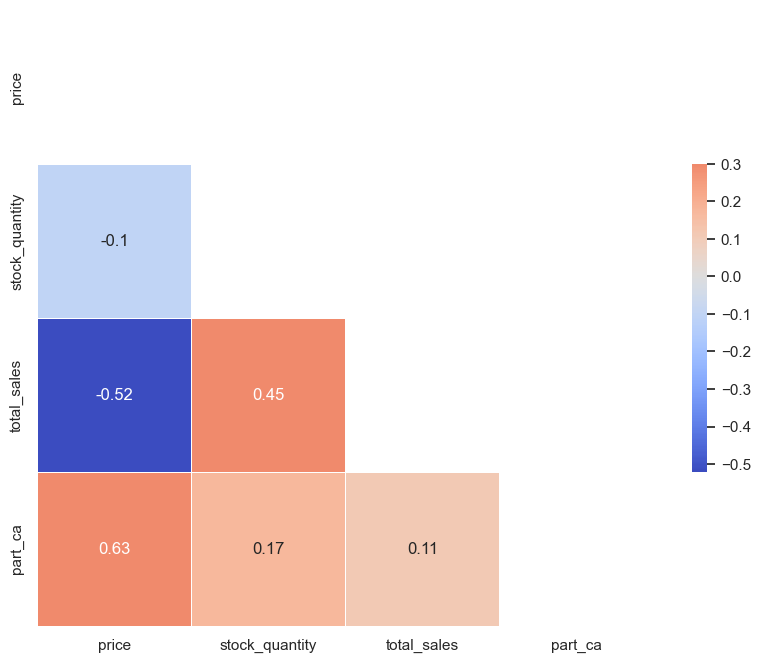

In [120]:
############################
# Analyse des correlations #
############################

#Création d'un heatmap de correlation avec les variables stock, sales et price
#on peut également créer un mask pour n'afficher qu'une demi heatmap

# Selection des colonnes numeric pour le calcul de correlation 
df_numeric = df_web_erp.select_dtypes(include=[np.number])

# Calcul de la matrice de corrélation
corr = df_numeric.corr()

# Création d'un mask pour n'afficher que la partie supérieure de la heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configuration de la heatmap
sns.set_theme(style="white")

# Dessin de la heatmap avec le mask et le ratio d'aspect correct
plt.figure(figsize=(10,8))
sns.heatmap(corr, mask=mask, cmap="coolwarm", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [121]:
import plotly.express as px

# Tracé d'un nuage de points entre 'price' et 'CA'.
fig = px.scatter(df_web_erp, x='price', y='part_ca', title='Nuage de points entre Prix et Chiffre d\'Affaires')

# Affichage du graphique.
fig.show()


In [122]:
import plotly.express as px

# Tracé d'un nuage de points entre 'price' et 'CA'.
fig = px.scatter(df_web_erp, x='price', y='total_sales', title='Nuage de points entre le prix et les quantités vendues')

# Affichage du graphique.
fig.show()
